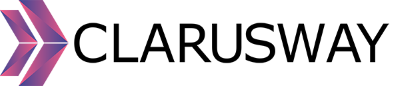

#**Clustring: K-means and Agglomeraative**

# ✿

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

# ✿

In [36]:
#First, import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import warnings
warnings.filterwarnings('ignore')

In [74]:
import sklearn

sklearn.__version__


'1.2.2'

In [37]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
#used to configure the Matplotlib plotting library for inline plotting and to set the default figure size, respecti

In [38]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#Load Data
df = pd.read_csv("/content/drive/My Drive/Cluster/Mall_Customers.csv")
# show the first 10 rows
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# **Data Explaory:**

In [40]:
##Renamimg some of the columns so dealing with the data become more easier
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [41]:
df.drop(columns="CustomerID", inplace=True)
# CustomerID is like index for us, so we drop it.

In [42]:
#Checking the new data after editng
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [43]:
df.dtypes

Gender            object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

In [178]:
df.nunique()

Gender                                   2
Age                                     51
Annual_Income                           64
Spending_Score                          84
cluster_Annual_Income_Spending_Score     5
dtype: int64

In [44]:
df.describe(include="object").T
#To check the objects in our data
#As we see, there's 2 unique values and the top is female


,count,unique,top,freq
Gender,200,2,Female,112


In [45]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


(200, 4)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [47]:
#Is there any NaN values?
df.isnull().sum().any()

False

In [48]:
df.duplicated().sum()

0

# **2. Exploratory Data Analysis:**

In [49]:
print('Mean of Age:', df.Age.mean()) #calculates the mean age in the 'Age' column
print('Min of Age:', df.Age.min()) #finds the minimum age in the 'Age' column.
print('Max of Age:', df.Age.max()) # finds the maximum age in the 'Age' column

Mean of Age: 38.85
Min of Age: 18
Max of Age: 70


**In machine learning, a distribution is a mathematical function that describes the probability of a random variable taking on a particular value. In other words, it describes how the data is spread out. So here, we'e**

Text(0, 0.5, 'Count')

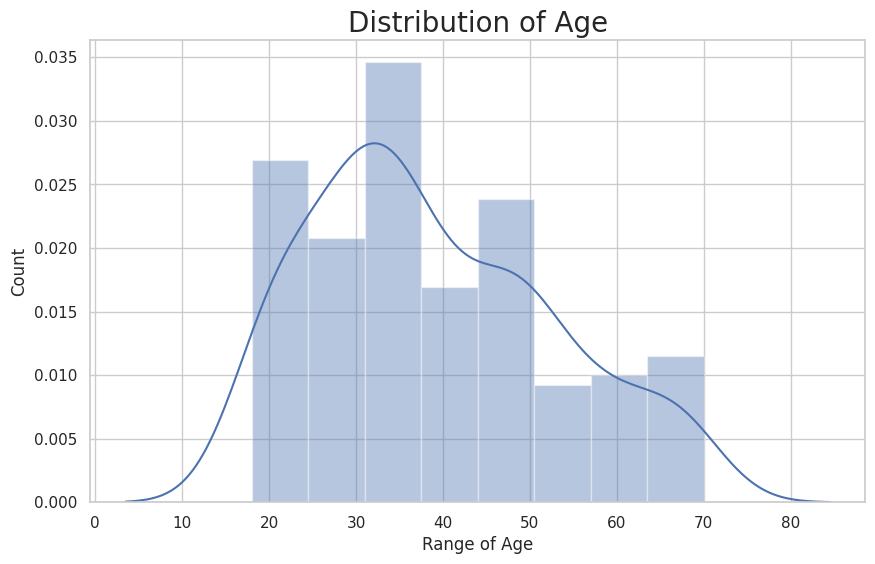

In [50]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

In [51]:
#the chart above shows that in thier 30s has the highest desnsity

Text(0, 0.5, 'Count')

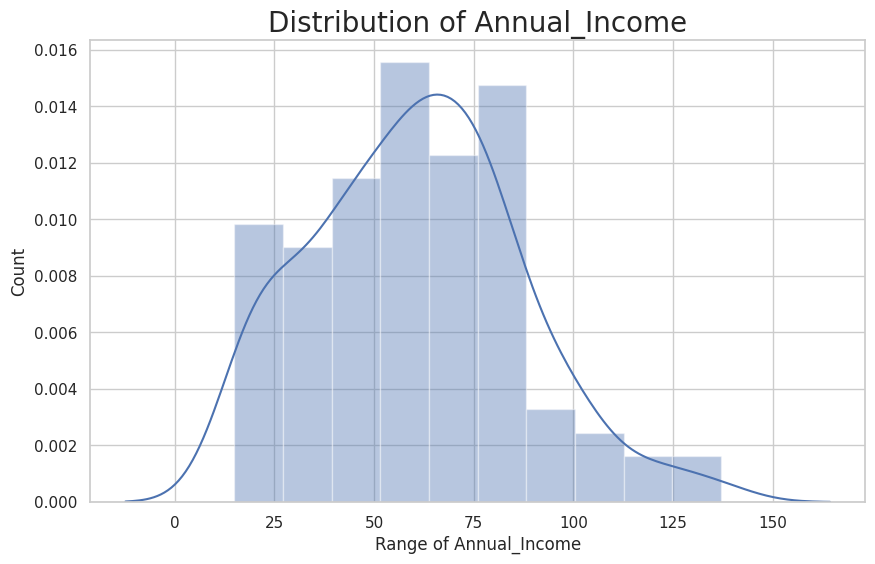

In [52]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual_Income'])
plt.title('Distribution of Annual_Income', fontsize = 20)
plt.xlabel('Range of Annual_Income')
plt.ylabel('Count')

In [53]:
#the chart above shows that most people has income between 50-75

Text(0, 0.5, 'Count')

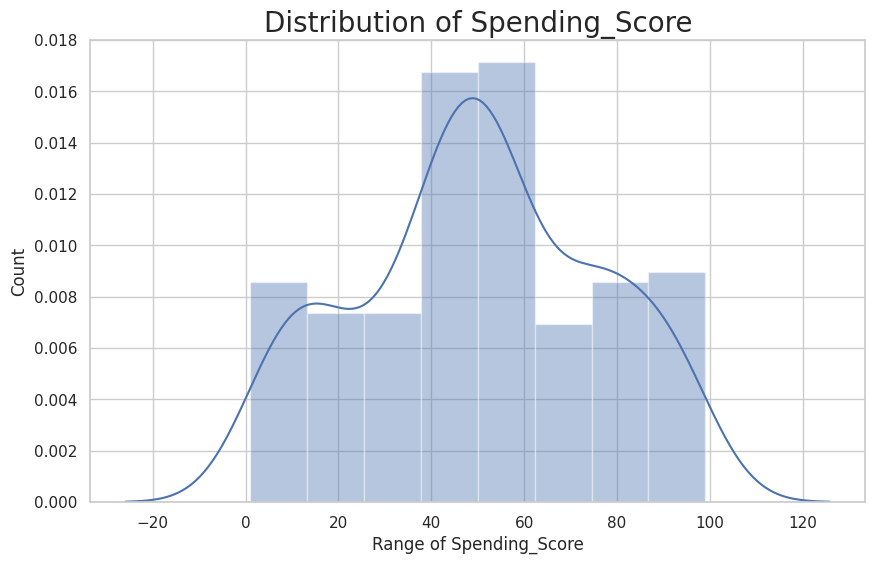

In [54]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending_Score'])
plt.title('Distribution of Spending_Score', fontsize = 20)
plt.xlabel('Range of Spending_Score')
plt.ylabel('Count')

In [55]:
#the chart above shows that most people has a spending score of 50

Text(0, 0.5, 'Count')

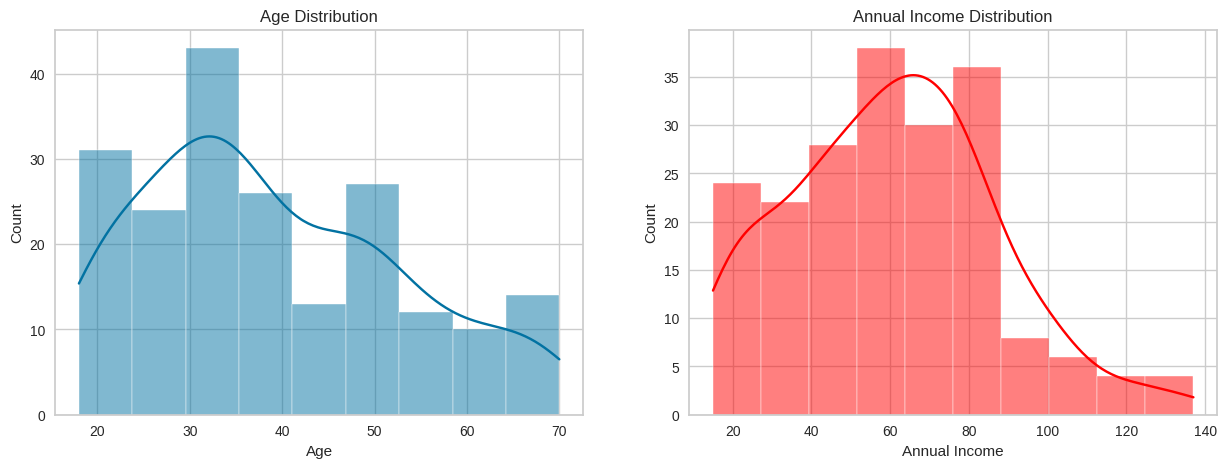

In [179]:
#Checking because i'll choose those
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

In [56]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

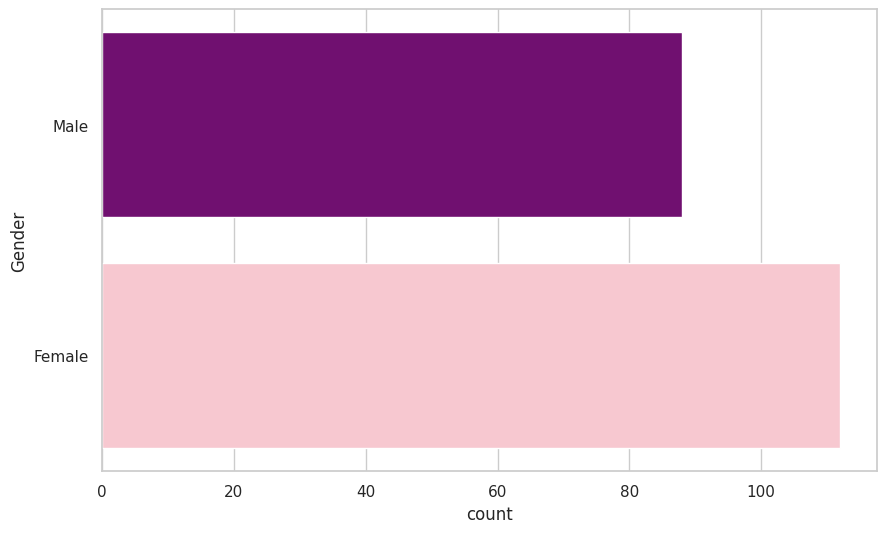

In [57]:
#represnting the gender column and showing the number of males&females in our data
sns.countplot(y="Gender", data=df, palette=["purple", "pink"])
plt.show()
#we have more females than males

In [ ]:
#The purpose of the violinplot is to visually compare the distribution of annual income data for different genders.
#A violin plot provides insights into the density of the data distribution within each gender category,
# allowing you to see the shape of the distribution, its spread, and potential multimodality (multiple peaks or modes) in the data.
#This visualization is especially useful for comparing income distributions between different gender groups.

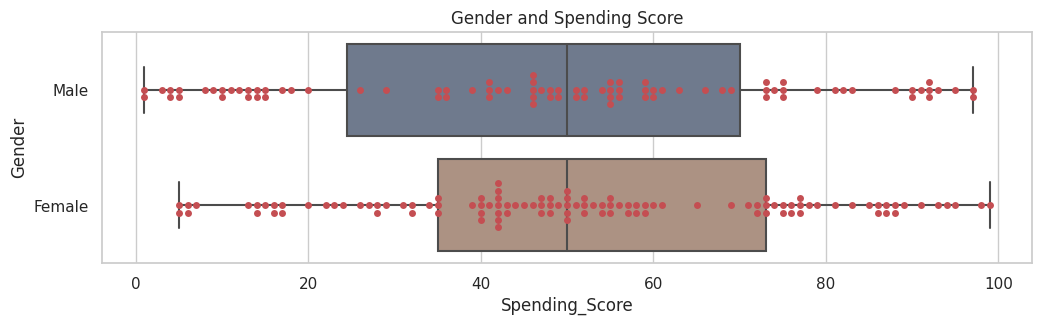

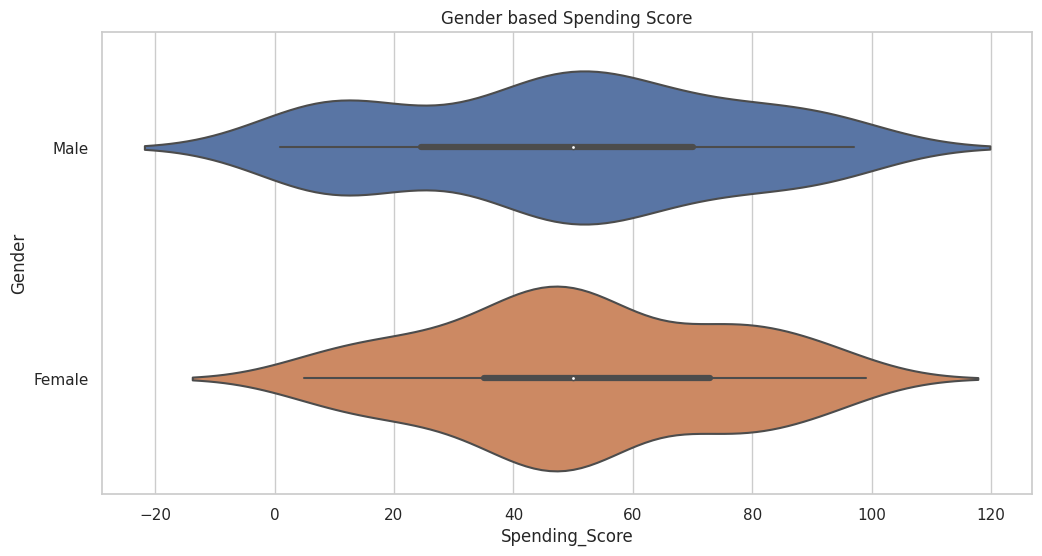

In [58]:
#This line creates a new figure with a specific size of 12 units in width and 3 units in height.
plt.figure(figsize=(12, 3))
#code generates a swarmplot. In the swarmplot,
#"Spending_Score" is on the x-axis, "Gender" is on the y-axis,
#and data is taken from the "df" DataFrame.
#The color="r" argument specifies that the points in the swarmplot should be colored red.
sns.swarmplot(x='Spending_Score', y='Gender', data=df, color="r")
sns.boxplot(x='Spending_Score', y='Gender', data=df, saturation=.3)
plt.title('Gender and Spending Score')
plt.show()

# stripplot : used to look at the density of categorical data.

plt.figure(figsize=(12, 6))
sns.violinplot(x='Spending_Score', y='Gender', data=df)
plt.title('Gender based Spending Score')
plt.show()

# With violinplot, we can see the density situation that we can't see in boxplot.

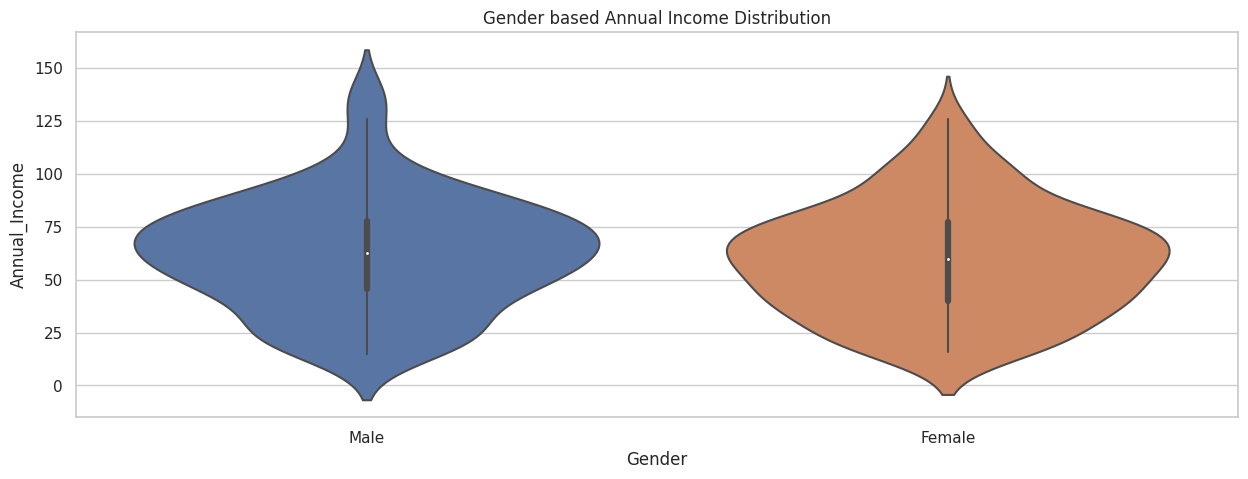

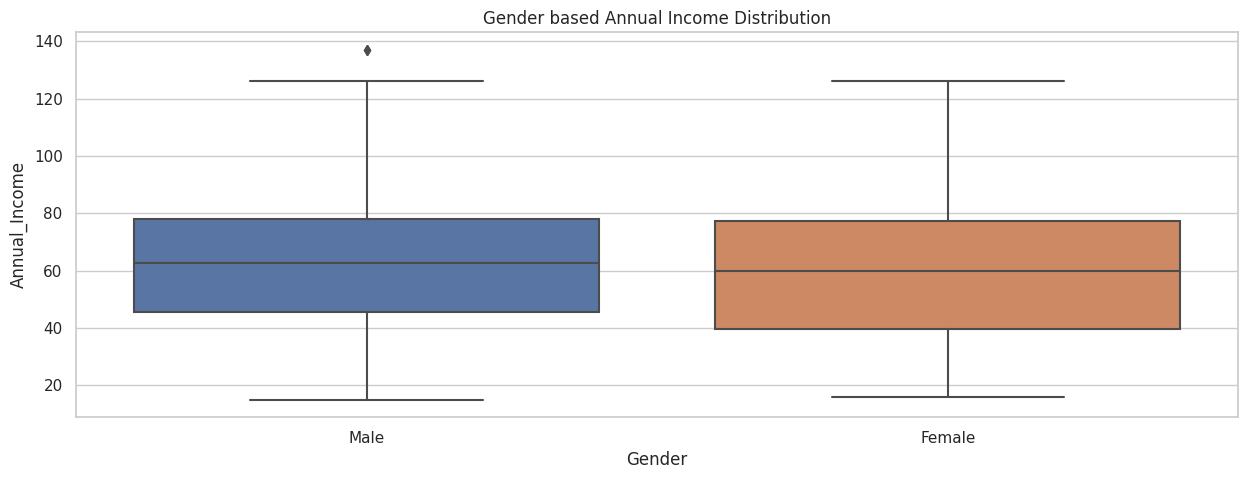

In [75]:
#The provided code is using the Seaborn library to create two different types of plots that
#compare the distribution of "Annual_Income" data based on the "Gender" variable in a dataset called "df."
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

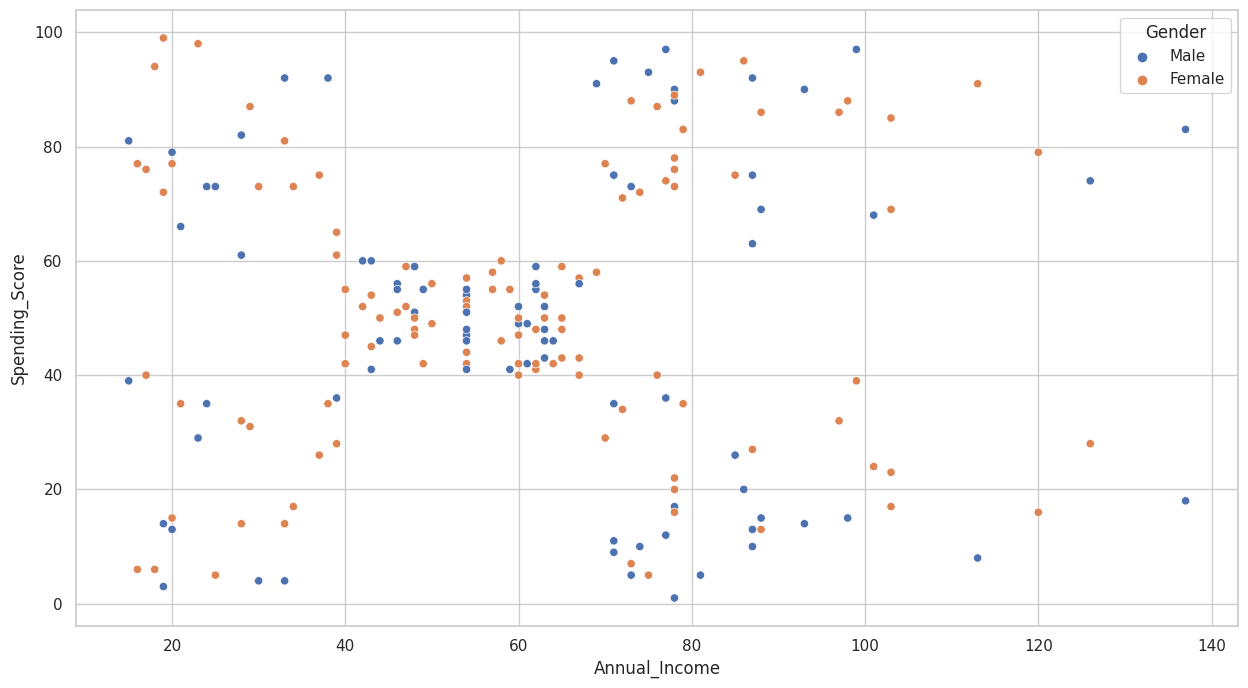

In [77]:
# Create a figure with a custom size of 16 inches by 8 inches.
fig, ax = plt.subplots(figsize=(15, 8))

# Create a scatterplot using Seaborn.
sns.scatterplot(
    x="Annual_Income",
    y="Spending_Score",
    data=df,
    hue="Gender",
    ax=ax,
)

# Show the plot.
plt.show()

In [ ]:
#This code creates a heatmap of the correlation matrix for the df data frame. The figsize argument is used to specify the size of the heatmap.
#The sns.heatmap() method is used to create the heatmap. The corr() method is used to calculate the correlation matrix for the df data frame.
#The cmap argument is used to specify the colormap for the heatmap. The annot argument is used to specify whether or not to show the correlation values on the heatmap.
#The title argument is used to specify the title of the heatmap. The fontsize argument is used to specify the font size of the title.

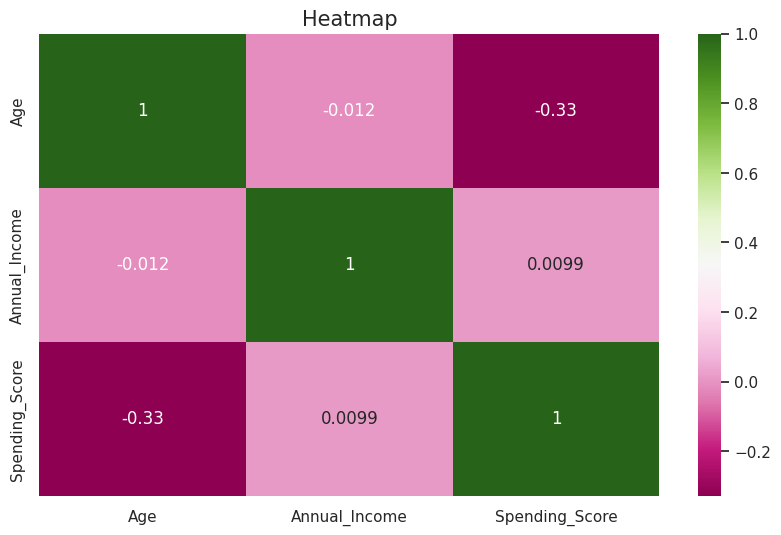

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = 'PiYG', annot = True)
plt.title('Heatmap', fontsize = 15)
plt.show()

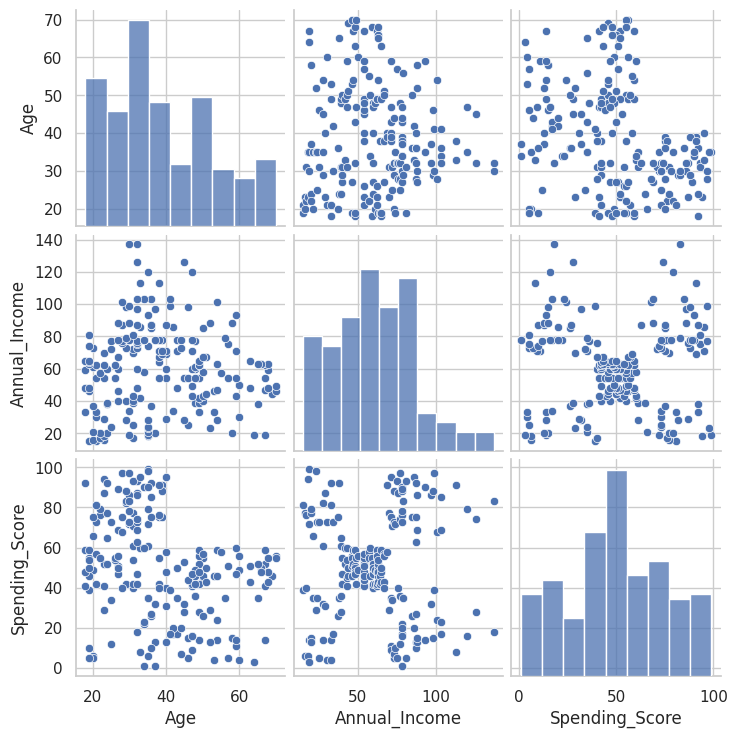

In [60]:
sns.pairplot(df);

# we look at pairplot to get an idea of how many clusters we can create using which variables.
# Caution : If your data has too many features it is hard to use pairplot. It will take too much time
# You can use PCA(dimension reduction technique) and use 3 to 5 componenets to get insight

# **3. Cluster Analysis**

**In machine learning, cluster analysis is an unsupervised learning technique that groups similar data points together. This is done by identifying patterns and similarities between data points, and then grouping them into clusters based on these similarities.**


##**Clustering based on Age and Spending Score**

 *i. Create a new dataset with two variables of your choice*

In [78]:
df_2 = df.drop(columns="Gender")
df_2
#We're deleting the gender column for two reasons:
#Because it's a categorical
#And We do not use categorical features in k-means algorithms. Only continuous values

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


**the Hopkins statistic is a measure of the clustering tendency of a dataset. A value of 0 indicates that the data is randomly distributed, while a value of 1 indicates that the data is perfectly clustered. Values between 0 and 1 indicate that the data is somewhere between randomly distributed and perfectly clustered.In this code, the Hopkins statistic is calculated by comparing the distances between points in a random sample of the data to the distances between points in a sample of the data that are drawn from the same clusters. If the data is clustered, then the distances between points in the same cluster will be smaller than the distances between points in different clusters. This will result in a lower Hopkins statistic.The Hopkins statistic can be used to assess the clustering tendency of a dataset before applying a clustering algorithm. If the Hopkins statistic is low, then it is unlikely that a clustering algorithm will be able to find meaningful clusters in the data.**

In [62]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [63]:
hopkins(df_2, 1)

# With hopkins test, whether the data is uniform or randomly distributed, it returns us a result about it.
# We say that the closer it is to 1, the more prone to data clustering.

0.69327266836851

# **K- means Clustering**

In [64]:
X_Age= df.loc[:,['Age','Spending_Score']]
X_Age

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


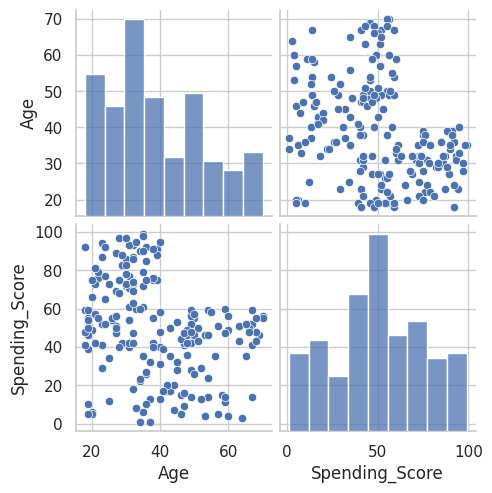

In [79]:
##### *ii. Determine optimal number of clusters*
sns.pairplot(X_Age);
# We look at the distributions of age and spending score.

#**Elbow method:**

**For finding the best number of k in k-means algorithm we use 2 methods The first
method is "The Elbow Method" which is a method used for finding the optimal values of k
in k-means algorithm, the “elbow” method is used to help data scientists select the
optimal number of clusters by fitting the model with a range of values for K. If the line
chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good
indication that the underlying model fits best at that point. In the visualizer “elbow” will
be annotated with a dashed line.**

In [66]:
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X_Age)
    wcss.append(kmeans.inertia_)

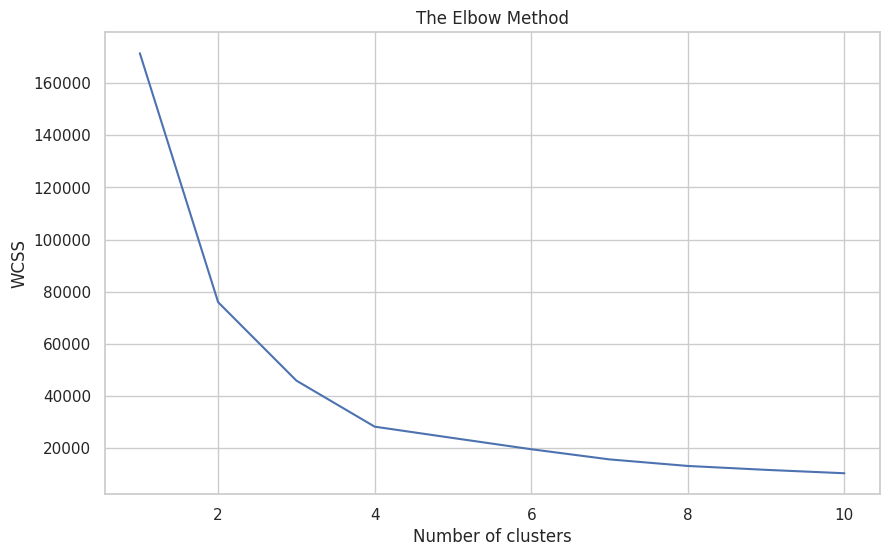

In [67]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 1.0, 'elbow method')

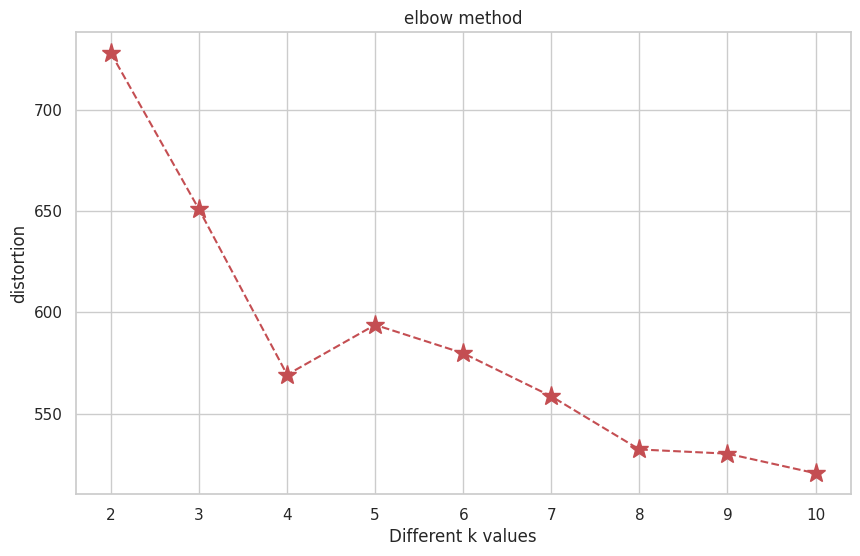

In [68]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_Age)
    distances = kmeanModel.transform(X_Age) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [ ]:
#So, I can see above that there's an arm, and around number 4, there's an elbow,
# so we can see this might be the best number of clusters.

#**Silhouette coefficient:**

**The second method is Silhouette coefficient, which is a method used to evaluate the quality of
clustering is referred to as silhouette analysis. Silhouette analysis can be applied to other clustering
algorithms as well. Silhouette coefficient ranges between −1 and 1, where a higher silhouette
coefficient refers to a model with more coherent (متماسك\محكم (clusters. In other words, silhouette
coefficients close to +1 means the sample is far away from the neighboring clusters. A value of 0 means
that the sample is on or very close to the decision boundary between two neighboring clusters. Finally,
negative values indicate that the samples could have potentially been assigned to the wrong cluster.**

In [69]:
for n_clusters in range(2,7):
# Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_Age)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X_Age, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.4692341232501655
For n_clusters = 3 The average silhouette_score is : 0.45300127016521263
For n_clusters = 4 The average silhouette_score is : 0.49973941540141753
For n_clusters = 5 The average silhouette_score is : 0.44526667994351227
For n_clusters = 6 The average silhouette_score is : 0.44381210013354916


**So, from the output that I got, it can be seen that the highest silhouette score got for the number of
clusters 4, which is (0.4997394150141753 However, the silhouette score started decreasing which
means that the clusters are assigned in the wrong way. Since we know the higher the silhouette score,
the chances get higher to the optimal one, so it can be said that the probable number of clusters should
be 4. However, by comparing the two methods it can be said that considering the higher accuracy of
getting a distinct number of clusters silhouette co-efficient method is more appropriate**


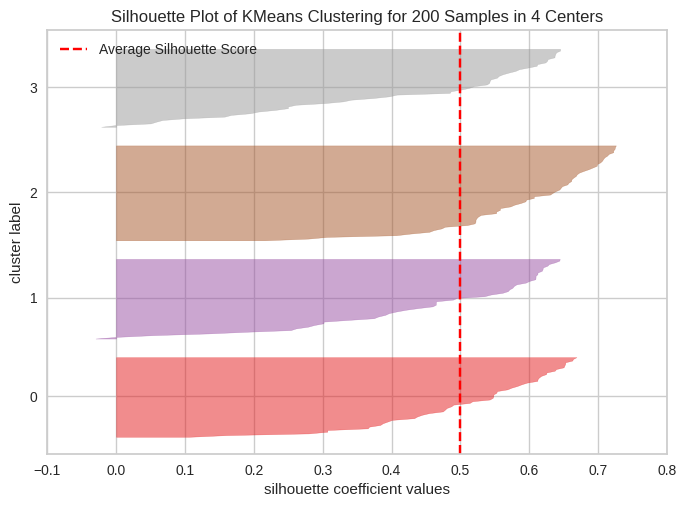

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:
#import
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_Age)  # Fit the data to the visualizer
visualizer.poof()

In [81]:
#The model3.n_clusters attribute is the number of clusters that the model3 KMeans clustering model is configured to find.
#In this case, the model3 KMeans clustering model is configured to find 4 clusters.
model3.n_clusters

4

###**K-Means Algorithm:**

In [82]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(X_Age)


array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [83]:
y_kmeans = kmeans.fit_predict(X_Age)

In [84]:
df_age = X_Age.copy()
df_age

# We perform the copy operation as we will perform a clustering operation and compare it with Hierarchical Clustering.


,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [85]:
#creates a new column in the df_age data frame called cluster_Kmeans.
#The values in the cluster_Kmeans column are the cluster labels for the data points in the X_Age data.
df_age["cluster_Kmeans"] = kmeans.fit_predict(X_Age)
# Add cluster_Kmeans as a column to df_age_ss.

In [86]:
#Print the new data
df_age

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


## **Visualizing and Labeling All the Clusters**

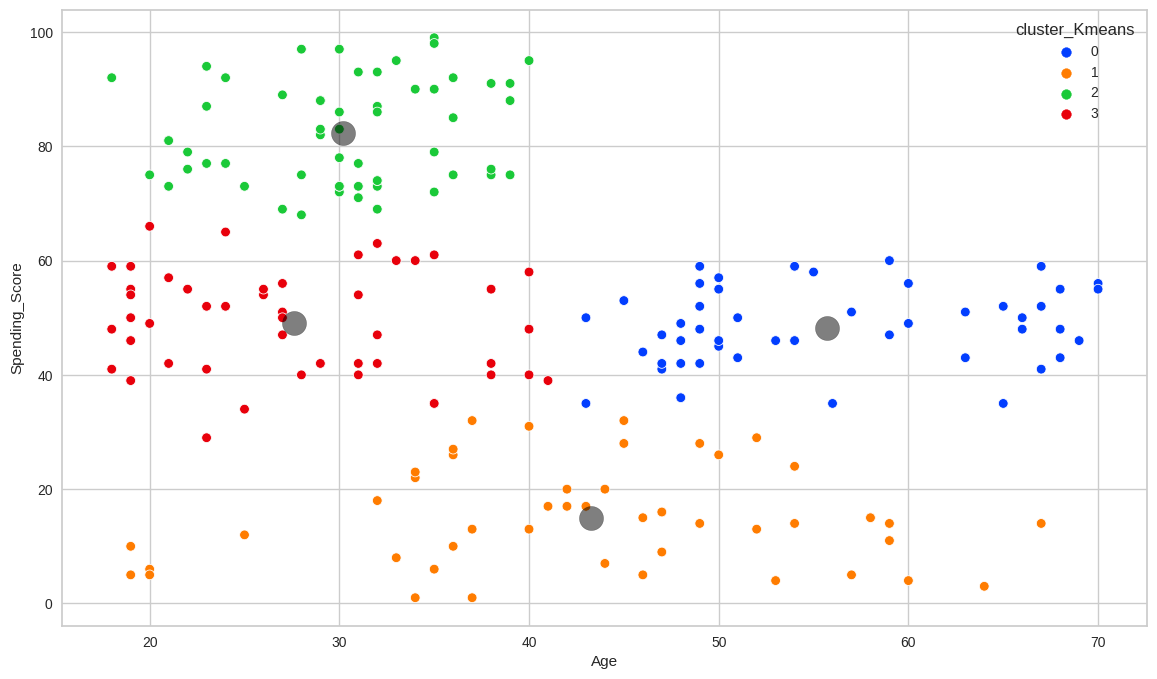

In [87]:
#This code creates a scatterplot of the Age and Spending_Score columns in the df_age data frame.
#The hue argument is used to color the data points based on the values in the cluster_Kmeans column.
#The palette argument is used to specify the color palette that is used to color the data points.
#The centers variable is assigned the cluster centers for the KMeans clustering model.
#The cluster_centers_ attribute of the KMeans clustering model is a NumPy array that contains the cluster centers for the model.
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_age,
                palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
# We look at clusters and centroids formed by age and spending score.

**The output of this code is a scatterplot of the Age and Spending_Score columns in the df_age data frame. The data points are colored based on the values in the cluster_Kmeans column. The cluster centers are plotted as black circles.This allows you to visualize the clusters that have been formed by the KMeans clustering model. You can see how the data points are grouped together based on their values in the Age and Spending_Score columns. You can also see the location of the cluster centers. The cluster centers are the points in the data space that are closest to the mean of all of the data points in a cluster. The cluster centers can be used to represent the clusters. In this case, the df_age data frame only contains the Age and cluster_Kmeans columns. This means that the scatterplot only shows the Age values for the data points. However, the cluster centers are still plotted. This allows you to see how the Age values are distributed across the clusters.**



---



### Clustering based on Annual Income and Spending Score

**Create a new dataset with two variables of your choice**

In [90]:
X_AN = df[['Annual_Income','Spending_Score']]
X_AN.head(10)

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [91]:
hopkins(X_AN, 1)

0.6975771000637162

# **Determine optimal number of clusters**

In [98]:
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 42)
    kmeans.fit(X_AN)
    wcss.append(kmeans.inertia_)


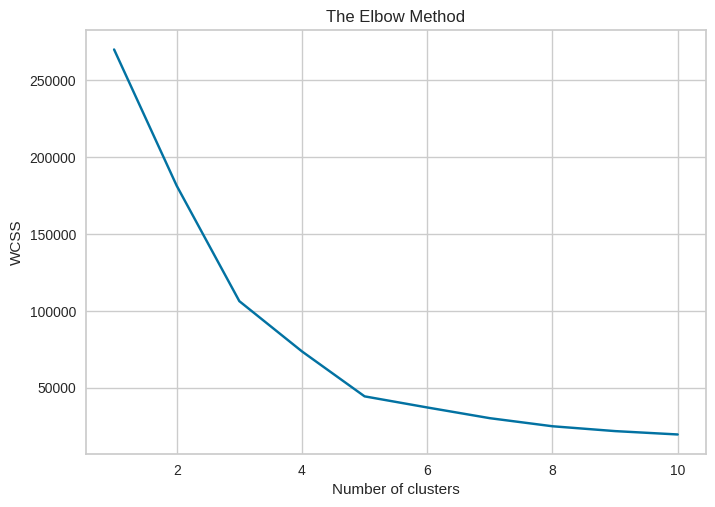

In [99]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [108]:
#This code performs K-means clustering on the X_AN data matrix. The KMeans() constructor is used to create a KMeans clustering model with 5 clusters.
#The fit() method is then used to fit the KMeans clustering model to the X_AN data matrix.

km= KMeans(n_clusters=5)
km.fit(X_AN)
y=km.predict(X_AN)
X_AN['Label']=y
X_AN.head()

,Annual_Income,Spending_Score,Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


#**silhouette_score**

In [102]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_AN)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_AN, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


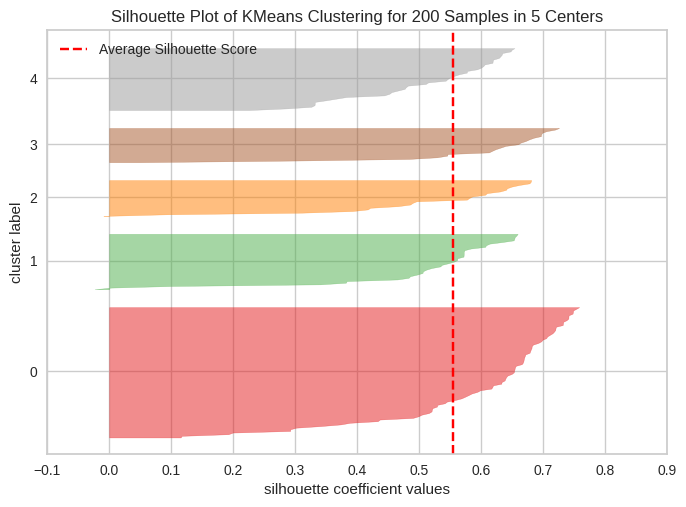

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [104]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X_AN)  # Fit the data to the visualizer
visualizer.poof()

In [109]:
#model3.n_clusters

for i in range(model4.n_clusters):
    label = (model4.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5039873487056818
mean silhouette score for label 2    : 0.5122676140736505
mean silhouette score for label 3    : 0.5990128687006722
mean silhouette score for label 4    : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


**So, from the output above from the elbow mwthod and the silhuette score, it the optimal number of clusters is 5.**


#**K- Means algorithm**

In [111]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X_AN)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [115]:
df_X_AN = X_AN.copy()
df_X_AN.head(10)

,Annual_Income,Spending_Score,Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
5,17,76,0
6,18,6,4
7,18,94,0
8,19,3,4
9,19,72,0


In [117]:
#This code adds a new column called cluster_Kmeans to the df_X_AN data frame.
#The values in the cluster_Kmeans column are the cluster labels for the data points in the XX_AN data.
df_X_AN['cluster_Kmeans'] = kmeans2.fit_predict(X_AN) #kmeans2.labels_
df_X_AN

,Annual_Income,Spending_Score,Label,cluster_Kmeans
0,15,39,4,2
1,15,81,0,3
2,16,6,4,2
3,16,77,0,3
4,17,40,4,2
...,...,...,...,...
195,120,79,3,4
196,126,28,2,1
197,126,74,3,4
198,137,18,2,1


#**Visualizing and Labeling All the Clusters**

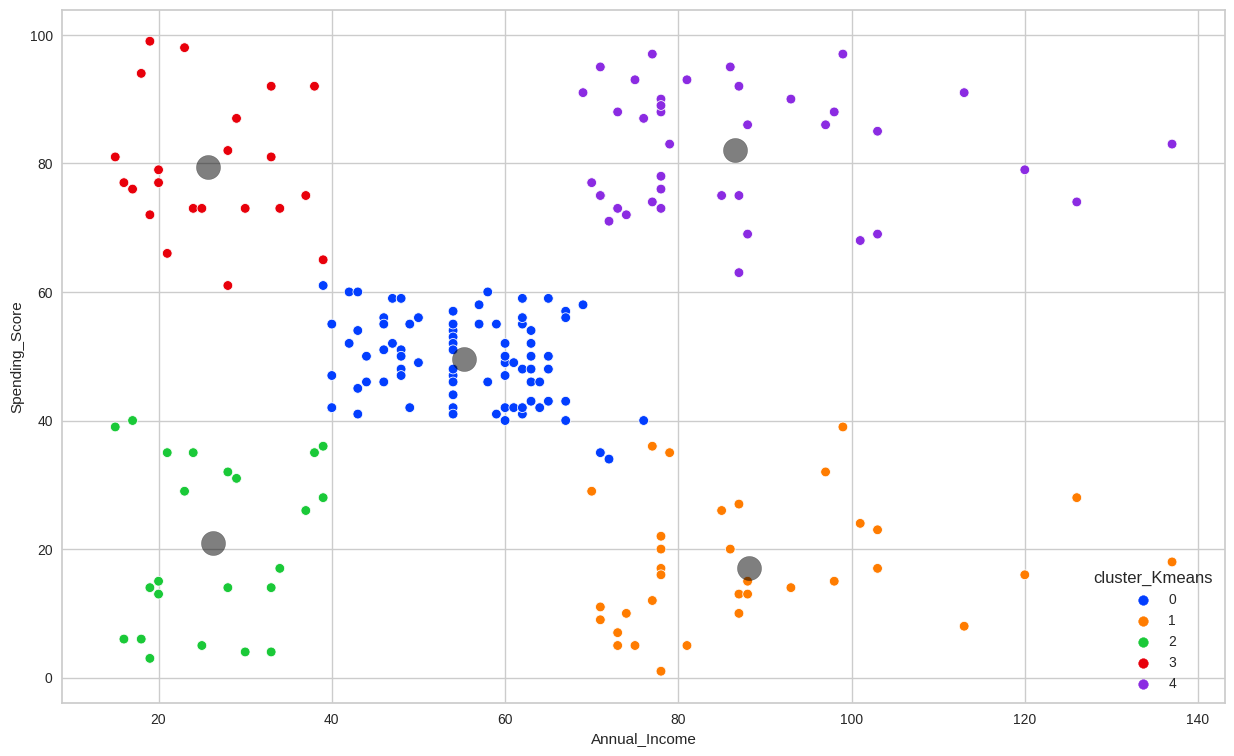

In [118]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_X_AN,
                palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

# We look at the clusters and centroids formed according to Annual_Income and Spending_Score.

# **As we can see, the clustring with 5 cluster in Annual_Income and Spending_Score is much better than 4 cluster in age and spending score.**

# -------------------------------------------------------------------------------------------------------------------------

# **Hierarchical Clustering**

**Hierarchical clustering is a type of clustering algorithm that creates a hierarchy of clusters. This is done by starting with each data point as its own cluster and then repeatedly merging the two most similar clusters until a single cluster remains.**

### Clustering based on Age and Spending Score

In [119]:
X_Age

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#**Dendrogram**
**the result of hierarchical clustering is a dendrogram, which is a tree-like diagram that shows the relationships between the clusters. The dendrogram can be used to identify the natural groupings in the data.**

In [121]:
#This code uses the linkage() function to calculate the linkage matrix for the X_Age data.
#The linkage() function takes a data matrix and a linkage method as input.
#The linkage method is used to determine the distance between clusters.
hc_ward = linkage(y = X_Age, method = "ward")
hc_complete = linkage(X_Age, "complete")
hc_average = linkage(X_Age, "average")
hc_single = linkage(X_Age, "single")


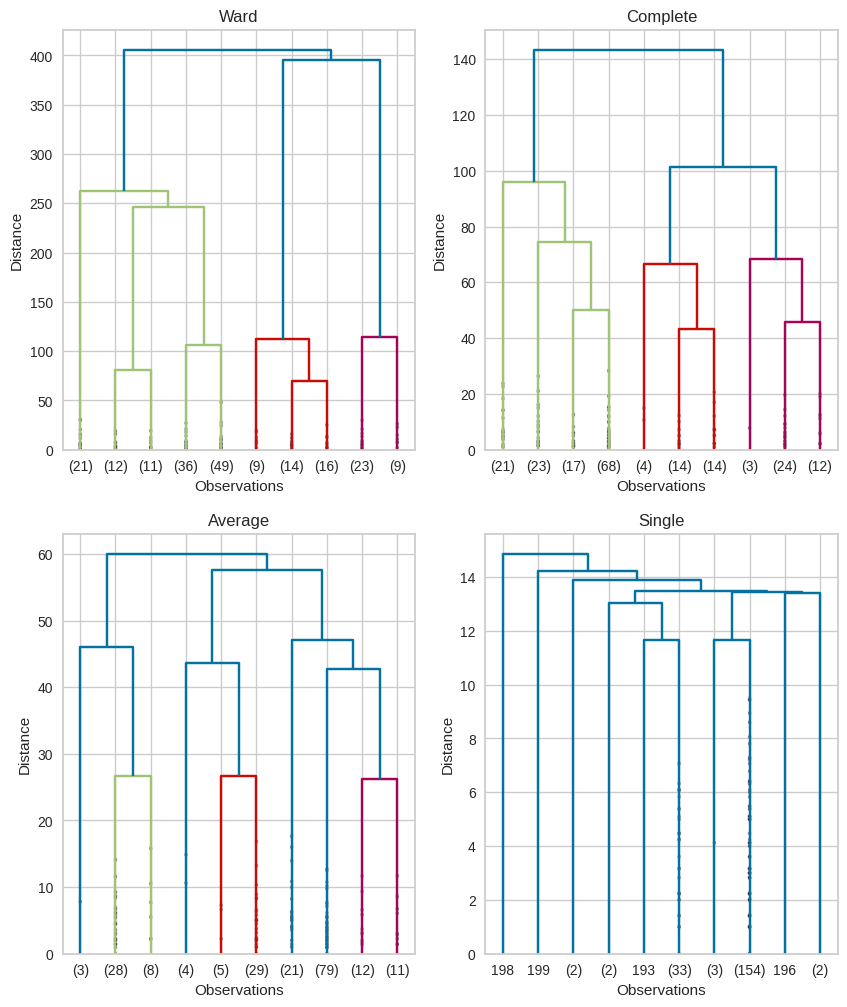

In [128]:
plt.figure(figsize = (10,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [ ]:
# Recommended us 2 clusters, but considering the distances between clusters, it recommends 2 . For that reason ;
# Let's take some advice by looking at silhouette_scores:

#**silhouette Score**

In [124]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_Age)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_Age, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


# **Clustering based on Annual Income and Spending Score**

In [125]:
X_AN

,Annual_Income,Spending_Score,Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


#**Dendrogram**

In [126]:
hc_ward = linkage(y = X_AN, method = "ward")
hc_complete = linkage(X_AN, "complete")
hc_average = linkage(X_AN, "average")
hc_single = linkage(X_AN, "single")

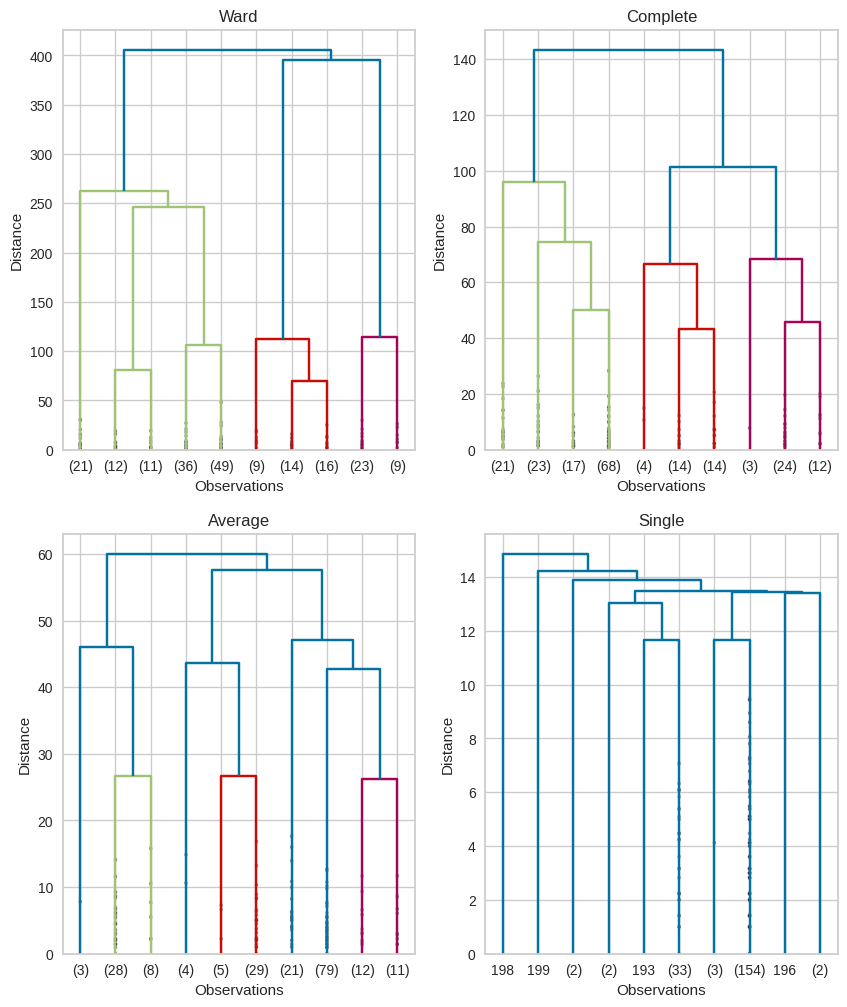

In [127]:
plt.figure(figsize = (10,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

#**silhouette score**

In [129]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_AN)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_AN, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36700017862176
For n_clusters=3, the silhouette score is 0.4617804331839923
For n_clusters=4, the silhouette score is 0.491618605854862
For n_clusters=5, the silhouette score is 0.5536572113406742
For n_clusters=6, the silhouette score is 0.53864092060385
For n_clusters=7, the silhouette score is 0.5205137486970374
For n_clusters=8, the silhouette score is 0.43303817216230284
For n_clusters=9, the silhouette score is 0.43936003773362403
For n_clusters=10, the silhouette score is 0.434662815290919


#**Agglomerative Clustering:**



#### **Age vs. Spending Score**

In [130]:
X_Age

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [137]:
Agg1 = AgglomerativeClustering(n_clusters=4,affinity="euclidean", linkage="ward")  #older sklearn
y_agg = Agg1.fit_predict(X_Age)

In [133]:
df_age

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


In [134]:
df_age['cluster_Agg'] = y_agg
df_age.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income vs. Spending Score

In [135]:
X_AN

,Annual_Income,Spending_Score,Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [136]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X_AN)

In [139]:
df_X_AN

,Annual_Income,Spending_Score,Label,cluster_Kmeans
0,15,39,4,2
1,15,81,0,3
2,16,6,4,2
3,16,77,0,3
4,17,40,4,2
...,...,...,...,...
195,120,79,3,4
196,126,28,2,1
197,126,74,3,4
198,137,18,2,1


In [140]:
df_X_AN['cluster_Agg'] = y_agg2
df_X_AN.head()

,Annual_Income,Spending_Score,Label,cluster_Kmeans,cluster_Agg
0,15,39,4,2,4
1,15,81,0,3,3
2,16,6,4,2,4
3,16,77,0,3,3
4,17,40,4,2,4


#**Visualizing and Labeling All the Clusters**

###**Age vs. Spending Score**

<Axes: xlabel='Age', ylabel='Spending_Score'>

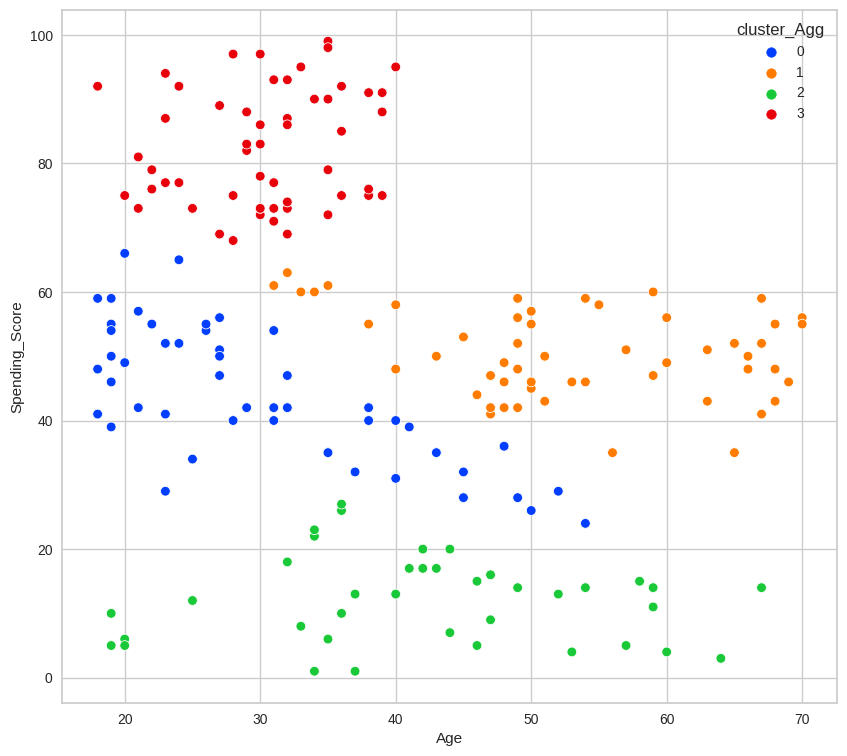

In [143]:
plt.figure(figsize=(10, 9))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age,
                palette="bright")

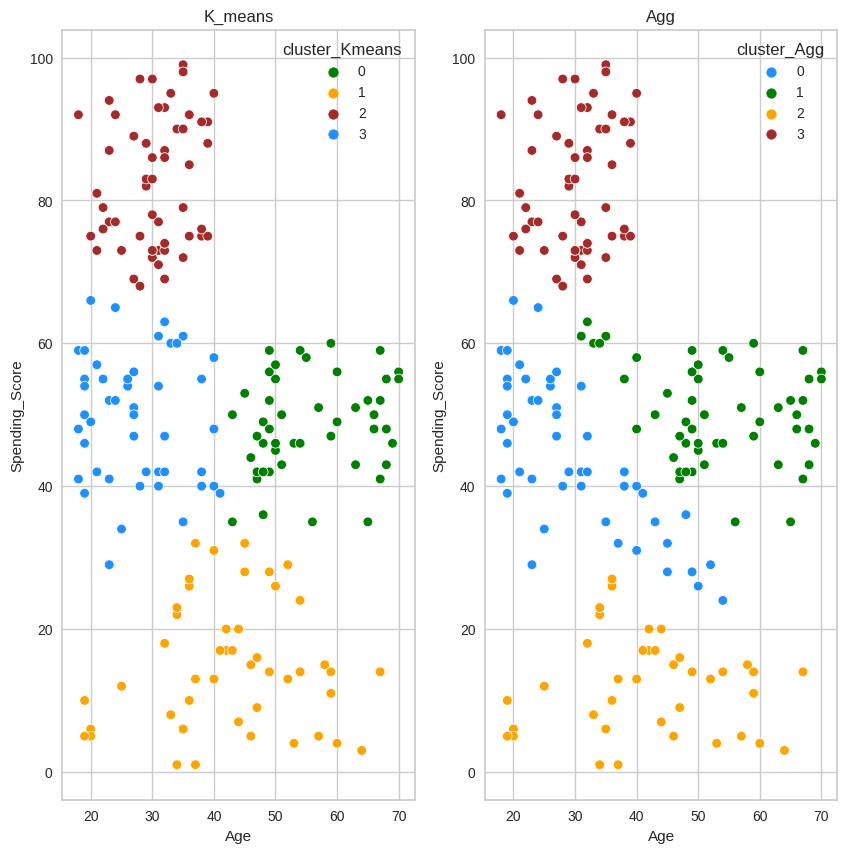

In [150]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_age,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

In [ ]:
# Hierarchical Clustering has not drawn the cluster boundaries sharply.
# It is necessary to pay attention to this. Kmeans is better separated.

#### Annual Income and Spending Score

In [151]:
df_X_AN

,Annual_Income,Spending_Score,Label,cluster_Kmeans,cluster_Agg
0,15,39,4,2,4
1,15,81,0,3,3
2,16,6,4,2,4
3,16,77,0,3,3
4,17,40,4,2,4
...,...,...,...,...,...
195,120,79,3,4,2
196,126,28,2,1,0
197,126,74,3,4,2
198,137,18,2,1,0


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

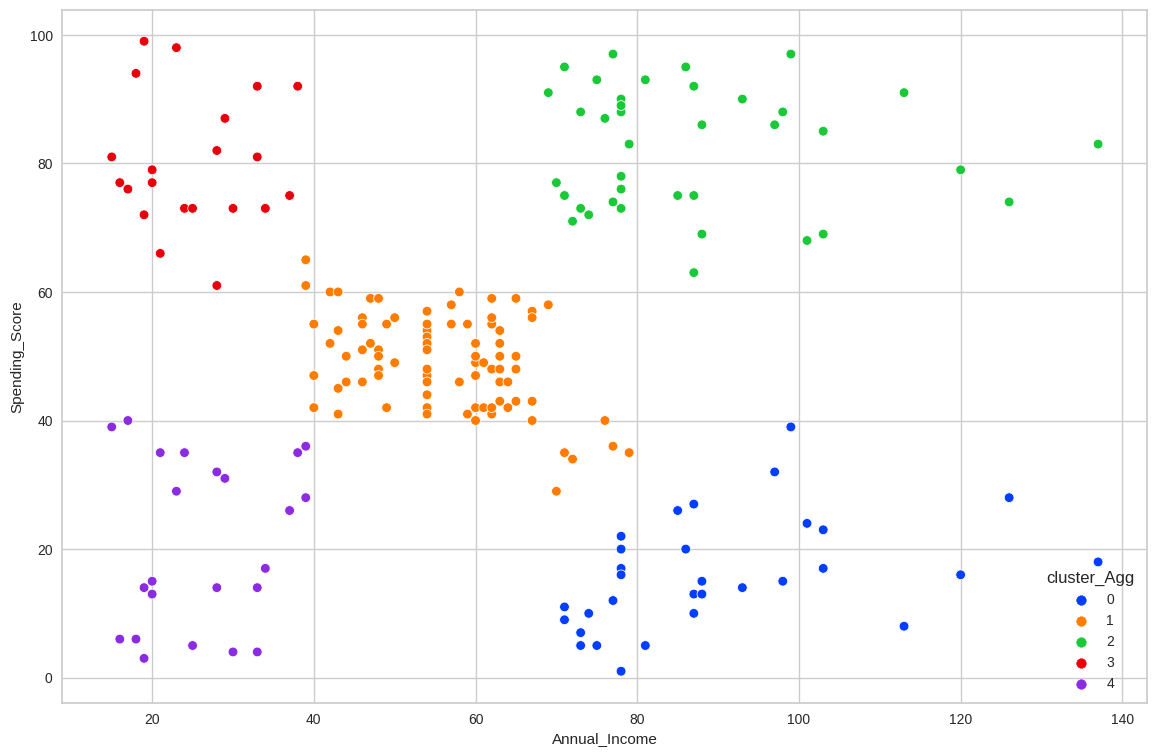

In [152]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_X_AN,
                palette="bright")

Text(0.5, 1.0, 'Agg')

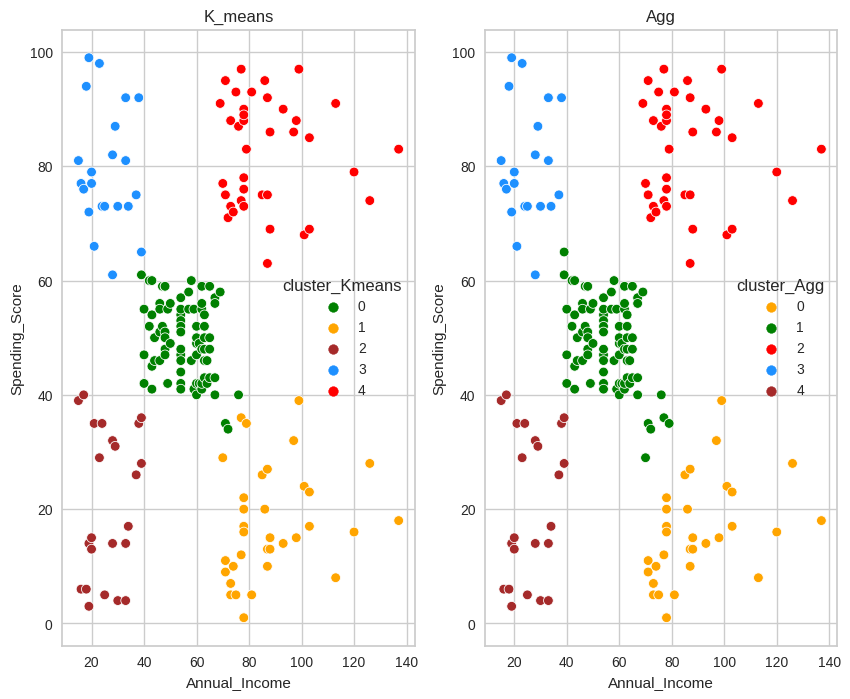

In [154]:
plt.figure(figsize=(10, 8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_X_AN,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_X_AN,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score

In [155]:
df_age


,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

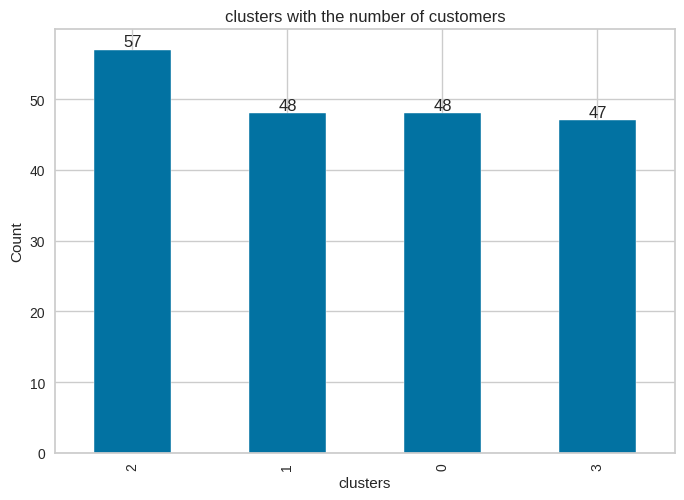

In [157]:
# lets see the number of poeple lie in each group
#The output of this code would be a bar plot with three bars. The first bar would be labeled "0",
#the second bar would be labeled "1", and the third bar would be labeled "2".
#The heights of the bars would be 3, 1, and 2, respectively.
#This allows you to see how many customers are in each cluster.
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [158]:
#This code adds a new column called cluster_Age_Spending_Score to the df data frame.
#The values in the cluster_Age_Spending_Score column are the same as the values in the
#cluster_Kmeans column of the df_age data frame.
df["cluster_Age_Spending_Score"] = df_age.cluster_Kmeans
df.head()

# We add clusters resulting from Kmeans to our df (age-spending score)

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


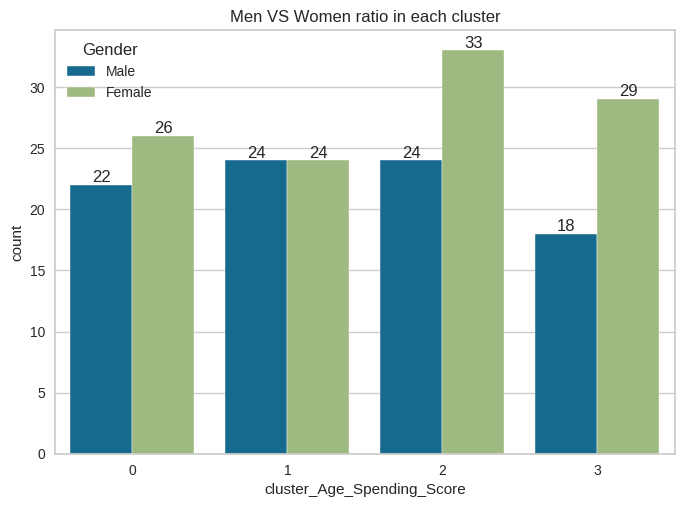

In [160]:
#This code creates a bar plot of the number of men and women in each cluster.
#The countplot() method is used to create a bar plot of the counts.
#The hue argument is used to color the bars based on the values in the Gender column of the df data frame.
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
# We count clusters according to gender.

In [ ]:
# 2 and 3 clusters draw attention to the excess of women.

In [162]:
#This code groups the data points in the df data frame by the values in the cluster_Age_Spending_Score column.
#The mean() method is then used to calculate the mean of each group.
df.groupby("cluster_Age_Spending_Score").mean()
#The output of this code is a data frame that contains the mean values for each group. The rows in the data frame correspond to the different cluster labels.
#The columns in the data frame correspond to the columns in the df data frame.
# We group them according to the clusters formed.

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

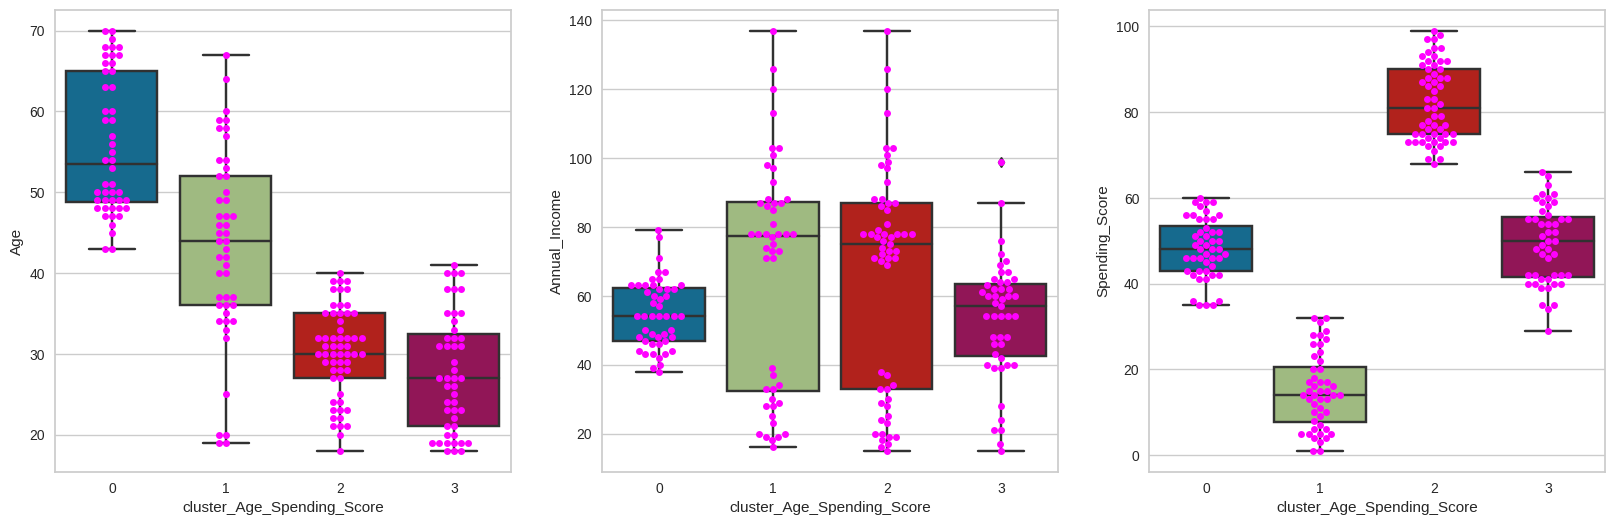

In [163]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual_Income",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending_Score",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")
#The output of this code is a figure with three subplots. The first subplot shows a box plot and a swarmplot of the Age variable for each cluster
#The second subplot shows a box plot and a swarmplot of the Annual_Income variable for each cluster.
#The third subplot shows a box plot and a swarmplot of the Spending_Score variable for each cluster.
#The box plots show the distribution of the data

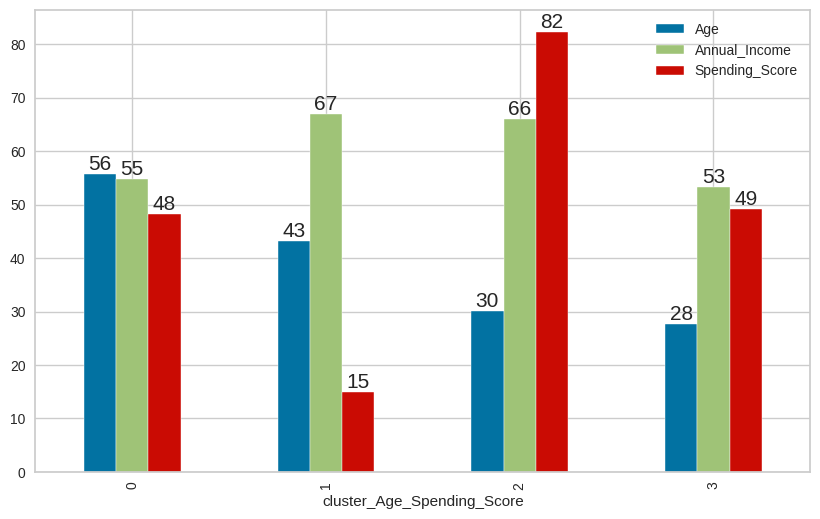

In [164]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(10, 6),
                                                          fontsize=10)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

# Note that we are using df.groupby("cluster_Age_Spending_Score").mean().
#The output of this code is a bar plot of the mean values for each group. The bars are labeled with the mean values for each group.

#**Conclusion**



**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

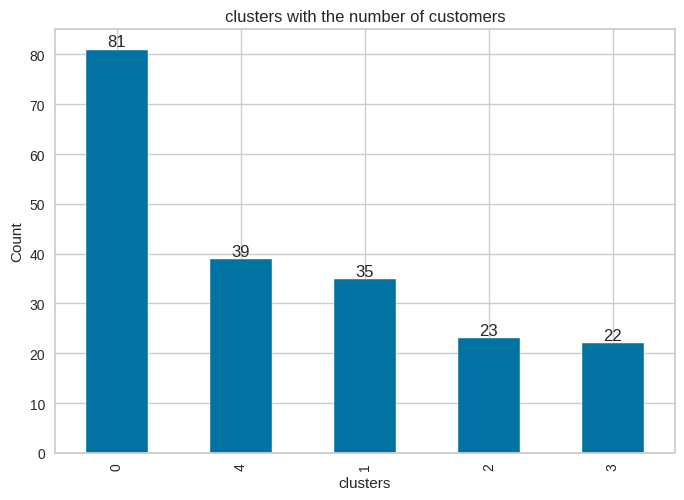

In [ ]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_ai_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [167]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [168]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

# According to Annual_Income and Spending_Score,
# we drop the cluster_Age_Spending_Score to get results according to the clusters we created with Kmeans.

In [171]:
df["cluster_Annual_Income_Spending_Score"] = df_X_AN.cluster_Kmeans
df.head()
# Add cluster_Annual_Income_Spending_Score column.

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


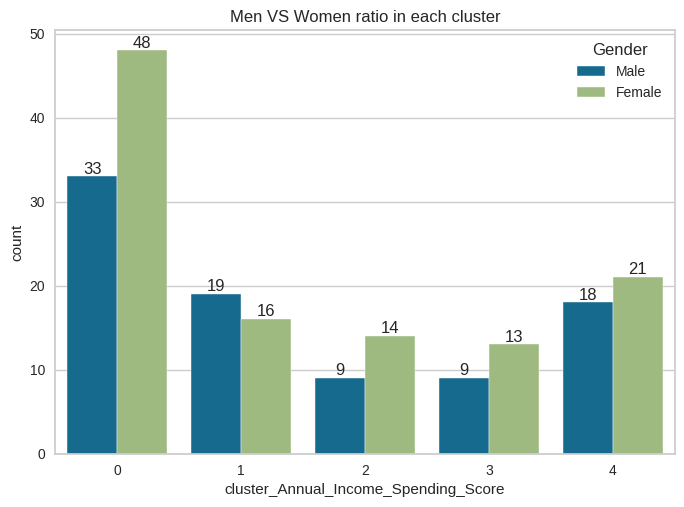

In [172]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

<Axes: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

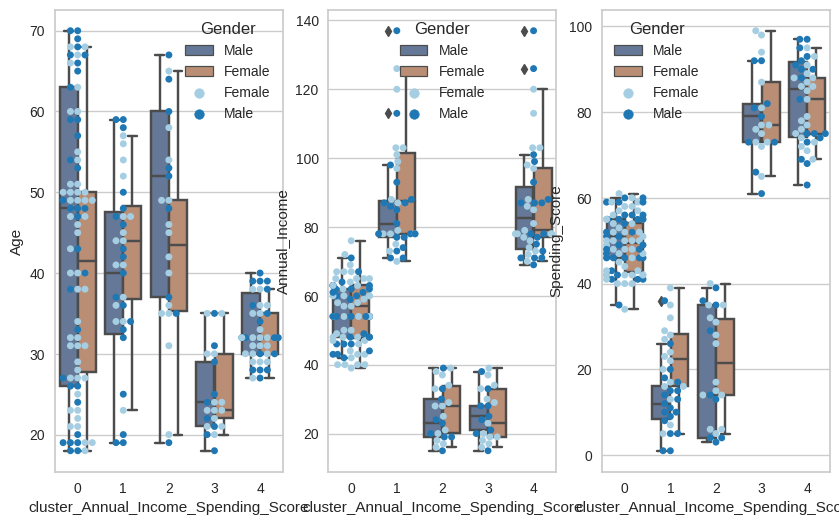

In [175]:
plt.figure(figsize = (10, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

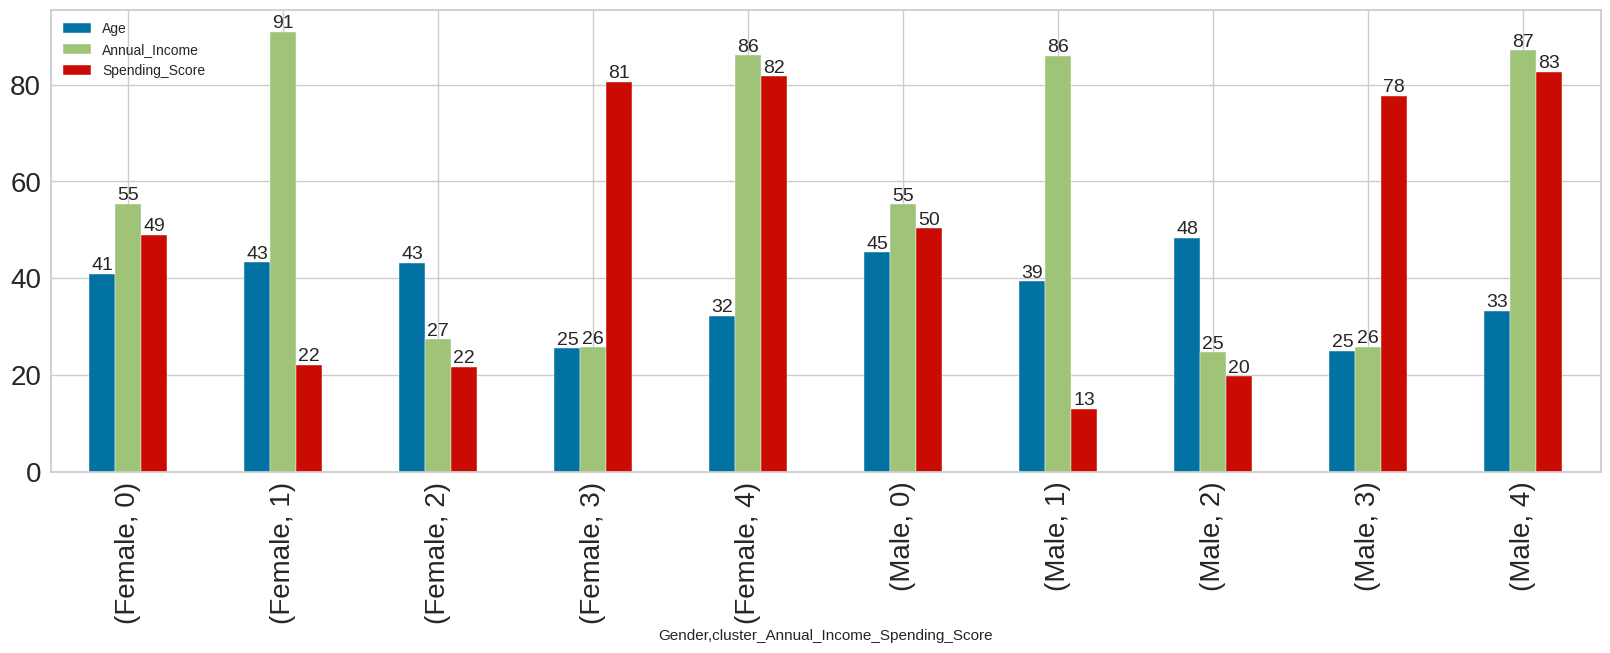

In [176]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

In [173]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# here we group df by both Gender and cluster_Annual_Income_Spending_Score.

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          21.714286  
       3                                          80.538462  
       4                                          81.666667  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          19.666667  
       3                                          77.666667  
       4                                          82.666667

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annual_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

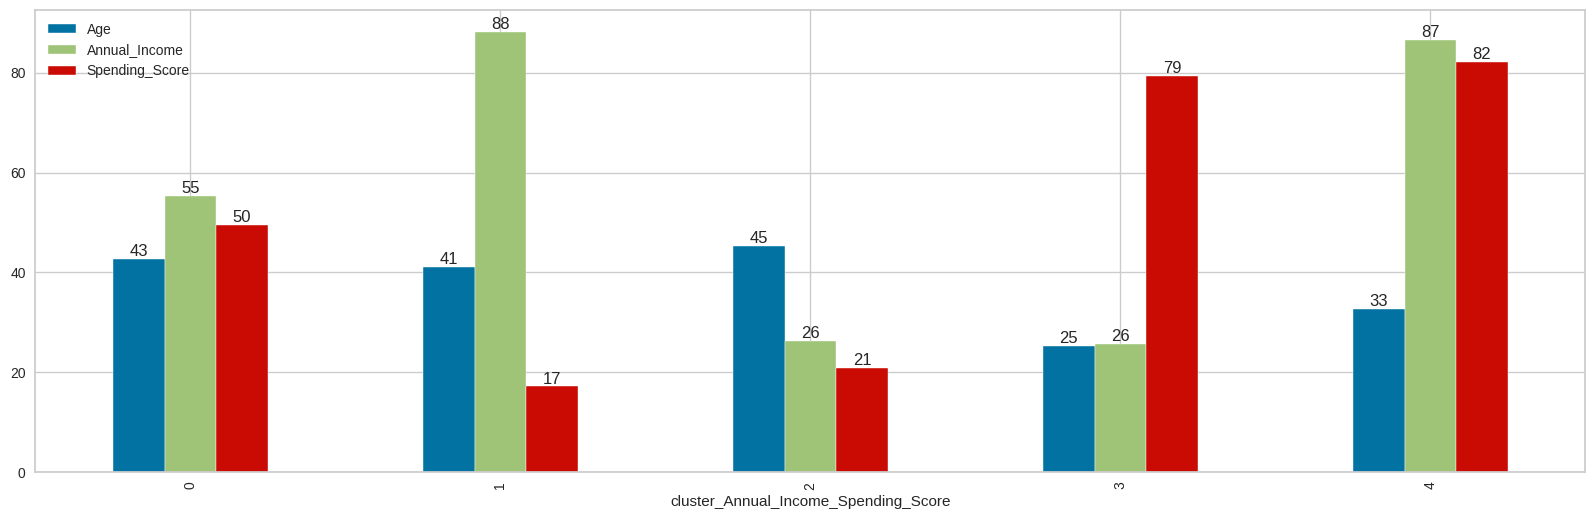

In [177]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annual_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.